### 5.1 확률론적 선형 회귀모형

### 부트스트래핑

In [2]:
# 상수항 w0 = 0, 기울기 w1 = 42.3855
from sklearn.datasets import make_regression

X0, y, coef = make_regression(
    n_samples=100, n_features=1, noise=20, coef=True, random_state=0)
coef

array(42.38550486)

In [4]:
dfX0 = pd.DataFrame(X0, columns=['X1'])
dfX = sm.add_constant(dfX0) #상수항 결합
dfy = pd.DataFrame(y, columns=['y'])

# 추정치 w0 = -1.628364, w1 = 42.853356 로 실제와 다름
model = sm.OLS(dfy, dfX)
result = model.fit()
result.params

const    -1.628364
X1       42.853356
dtype: float64

In [11]:
# 재표본화 하여 다른 데이터 집합을 만들고 회귀분석, 해당 행위를 1000번 진행
#time

N = 1000
params_w0 = np.zeros(N)
params_w1 = np.zeros(N)
for i in range(N) :
    idx = np.random.choice(len(dfy), len(dfy), replace =True)
    dfX2 = dfX.iloc[idx,:]
    dfy2 = dfy.iloc[idx]
    r = sm.OLS(dfy2, dfX2).fit()
    params_w0[i] = r.params.const
    params_w1[i] = r.params.X1

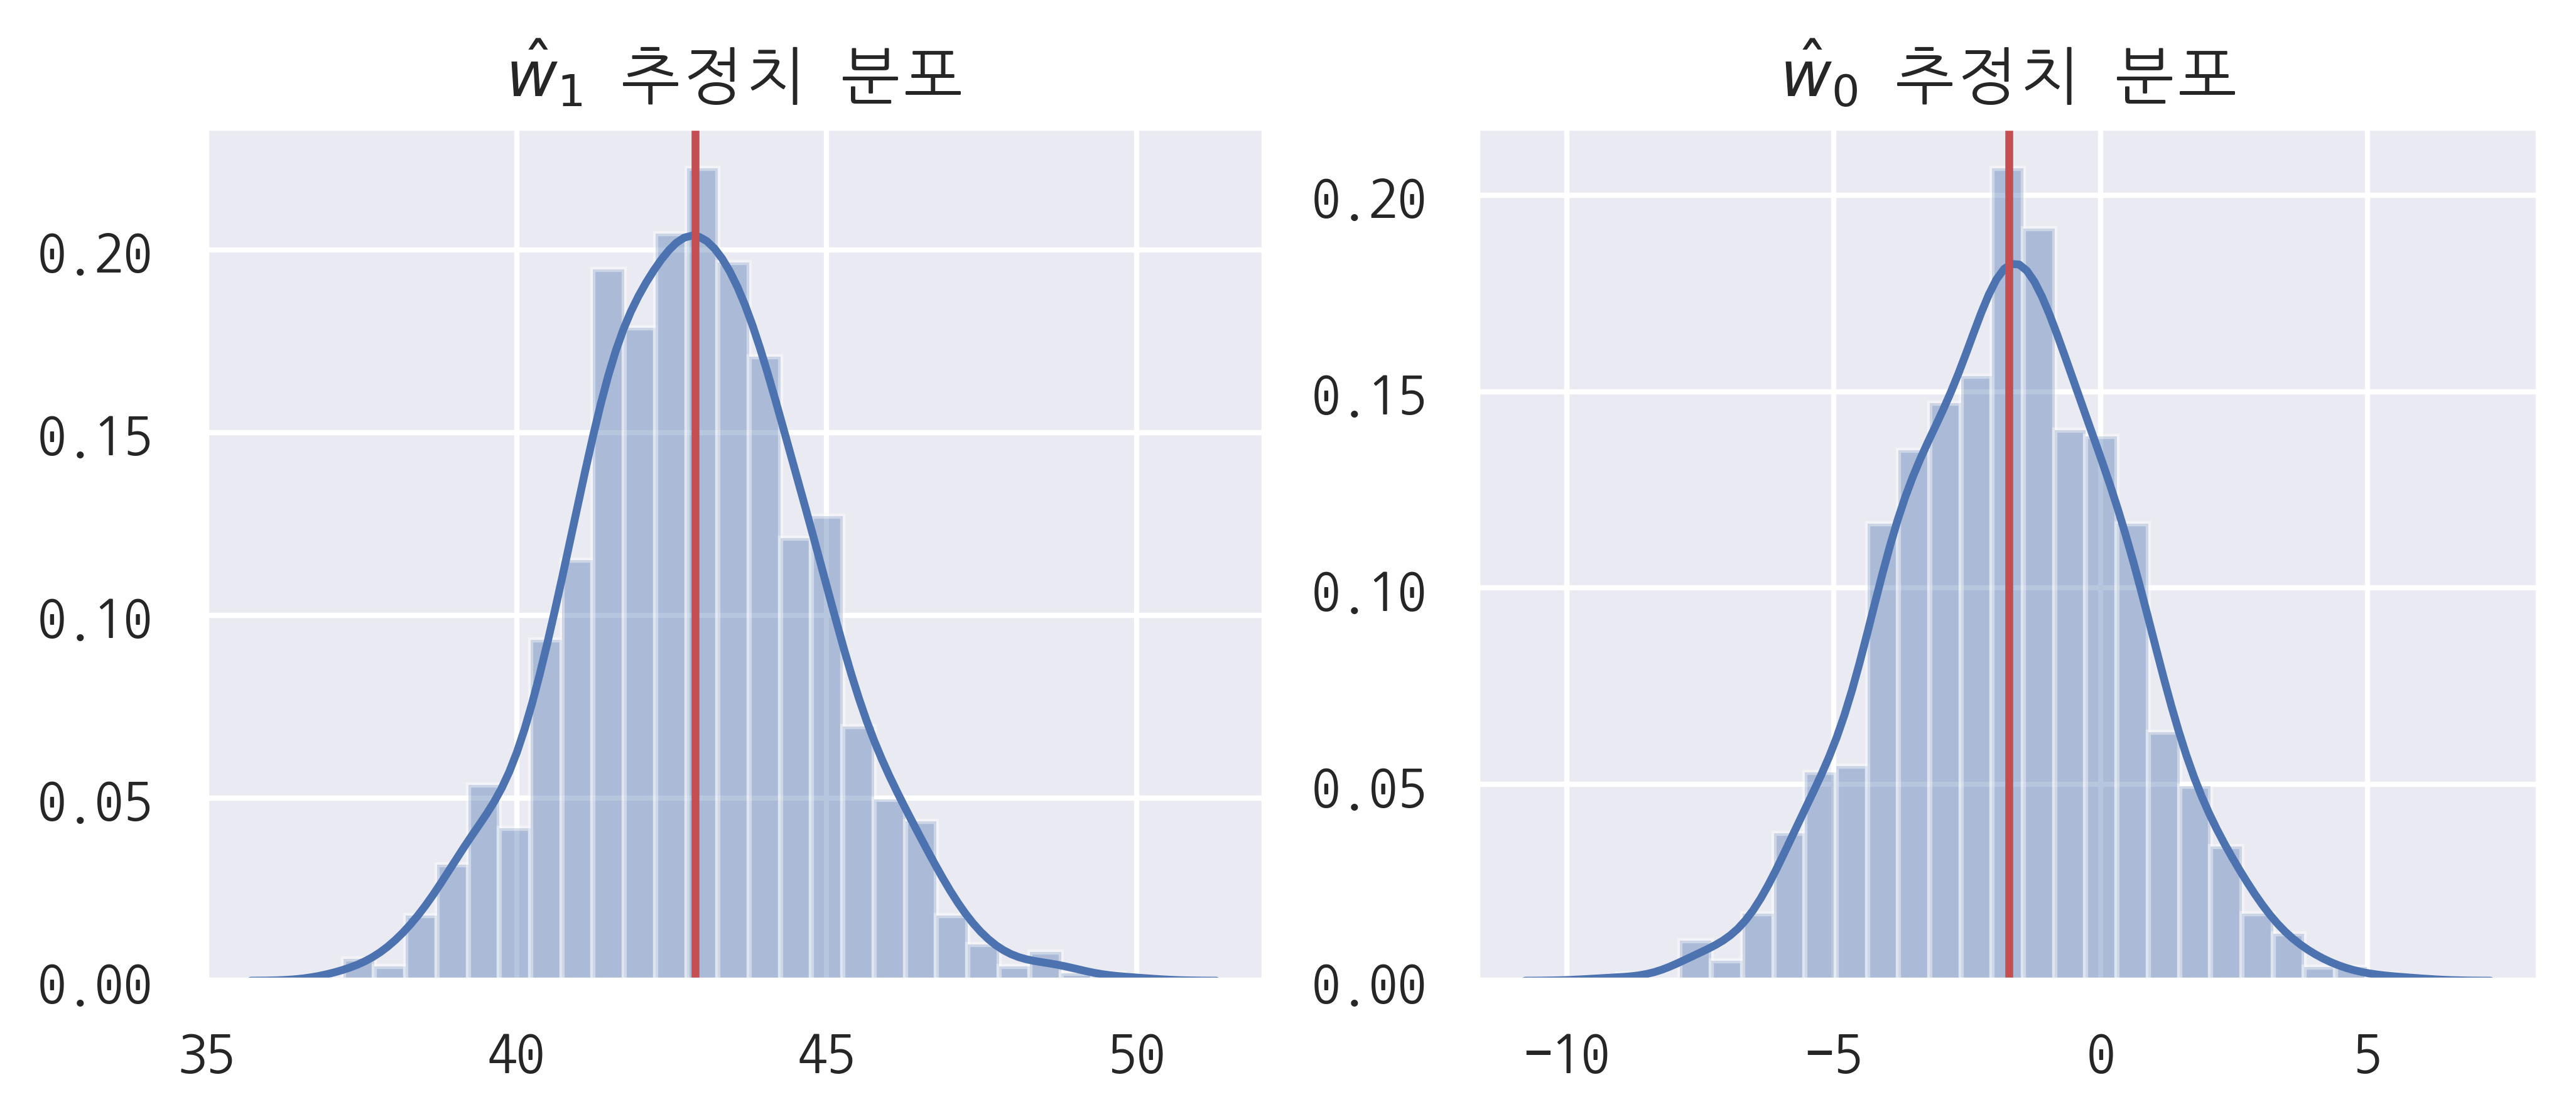

In [12]:
plt.figure(figsize=(8, 3))

ax1 = plt.subplot(121)
sns.distplot(params_w1, ax=ax1)
plt.axvline(params_w1.mean(), c='r')
plt.title("$\hat{w}_1$ 추정치 분포")

ax2 = plt.subplot(122)
sns.distplot(params_w0, ax=ax2)
plt.axvline(params_w0.mean(), c='r')
plt.title("$\hat{w}_0$ 추정치 분포")
plt.show()